# Ploting Tutorial

This tutorial acts as a guide to the plotting classes in ThermoState. It is designed to ease the creation of simple plots of thermodynamic states and processes for a variety of common substances. 

In order to use the plotting classes a basic knowledge of ThermoState is required. Tutorial.py may be used as a reference if any usage of ThermoState in this tutorial is unfamiliar to you.

The evaluation of the states and properties will be handled by ThermoState and so we must start by importing the parts of ThermoState that will enable this. Our second import will be to import the two ThermoState plotting classes, IdealGas and VaporDome. 

In [1]:
from thermostate import State, Q_, units
from thermostate.plotting import IdealGas, VaporDome

## Plot Creation

With the plotting classes imported we can begin creating our plots. The syntax for instantiating a class is VaporDome(substance, (x-axis, y-axis)) or IdealGas(substance, (x-axis, y-axis)) respectively. The tuple of axes are optional and more than one tuple may be entered if more than one plot is desired. The available axes to plot are T (temperature), p (pressure), v (mass-specific volume), u (mass-specific internal energy), h (mass-specific enthalpy), s (mass-specific entropy) and must be entered as a string. The substance is required and may be any ThermoState accepted substance enumerated in the list below:

* `water`
* `air`
* `R134a`
* `R22`
* `propane`
* `ammonia`
* `isobutane`
* `carbondioxide`
* `oxygen`
* `nitrogen`


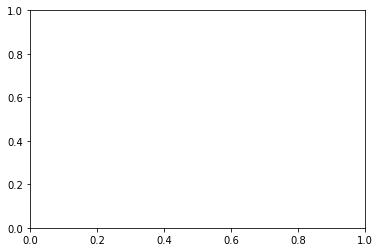

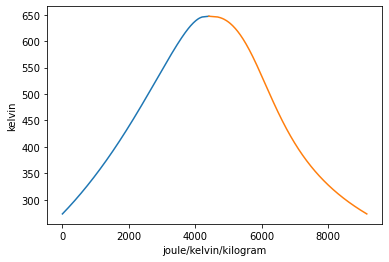

In [5]:
substance = 'water'
Ideal = IdealGas(substance, ('s', 'T'))
Vapor = VaporDome(substance, ('s', 'T'))

The VaporDome and Ideal gas classes are functionally the same with one major difference, the VaporDome class will overlay a vapor dome over whatever plot is created. For the remainer of the tutorial we will use VaporDome to illustrate the capabilities of both classes.

Before anything else the plot must be created before any states or processes may be added into the class instance. Plots may be created with the initialization of the class as shown above or may be added using the plot function. The syntax for the plot function is plot(x-axis, y-axis) where the axes follow the same rules as before. 

States may be added to the plot with the add_state function. The syntax for the add_state function is add_state(state, key = None) where state may be any ThermoState State object and key is set to none as default. The key input may be assigned a string which can be used to later remove the state from the graph if desired. The add_state function will retrieve the value of the appropriate the property for each axis with the proper units and plot them as a point on the previously created graphs. 

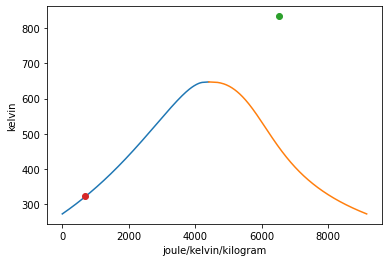

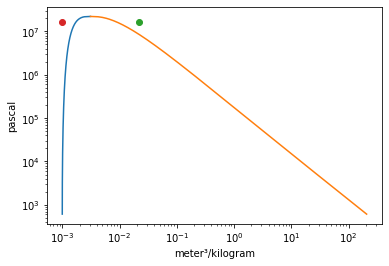

In [10]:
Vapor = VaporDome(substance, ('s', 'T'))
Vapor.plot('v','p')

T_1 = Q_(560.0, 'degC')
p_1 = Q_(16.0, 'MPa')
T_2 = Q_(50.0, 'degC')
p_2 = Q_(16.0, 'MPa')

st_1 = State(substance, T=T_1, p=p_1)
st_2 = State(substance, T=T_2, p=p_2)

Vapor.add_state(st_1)
Vapor.add_state(st_2)

The add_process function can connect graphed states together and trace out every point between the states while holding one property constant. The syntax for the function is add_process(state1, state2, process_type). The states do not have to be added to the graph prior to invoking this funciton. New states will be automatically added to the plot. The accepted process types are as follows:

* `isochoric`
* `isovolumetric`
* `isobaric`
* `isothermal`
* `isoenergetic`
* `isoenthalpic`
* `isentropic`

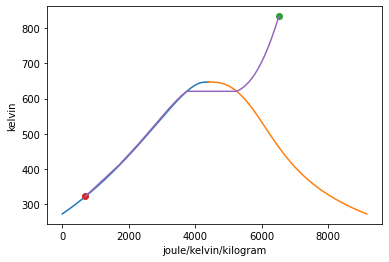

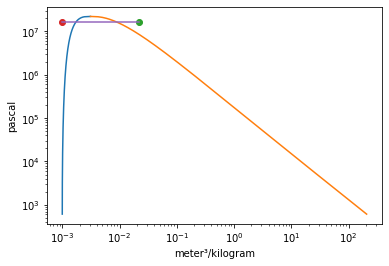

In [16]:
Vapor = VaporDome(substance, ('s', 'T'))
Vapor.plot('v','p')

T_1 = Q_(560.0, 'degC')
p_1 = Q_(16.0, 'MPa')
T_2 = Q_(50.0, 'degC')
p_2 = Q_(16.0, 'MPa')

st_1 = State(substance, T=T_1, p=p_1)
st_2 = State(substance, T=T_2, p=p_2)

Vapor.add_process(st_1, st_2, 'isobaric')

Both states an processes can be removed using the remove_state and remove_process functions respectively. The syntax for remove_state is remove_state(state = None, key = None). Either the state that is to be removed or its associated key must be input to the function to mark it for removal. 

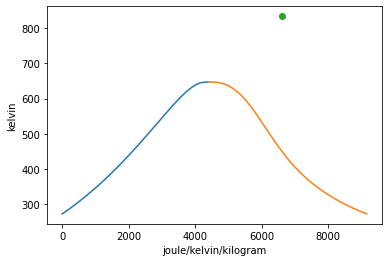

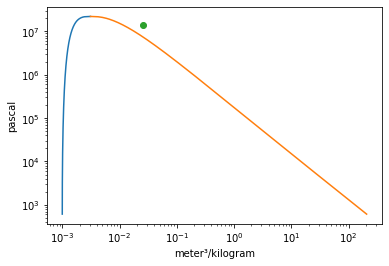

In [17]:
Vapor = VaporDome(substance, ('s', 'T'))
Vapor.plot('v','p')

T_1 = Q_(560.0, 'degC')
p_1 = Q_(14.0, 'MPa')
T_2 = Q_(75.0, 'degC')
p_2 = Q_(14.0, 'MPa')

st_1 = State(substance, T=T_1, p=p_1)
st_2 = State(substance, T=T_2, p=p_2)

Vapor.add_state(st_1)
Vapor.add_state(st_2)

Vapor.remove_state(st_2)

The remove_process function is meant to delete the specified process from the graphs. The remove_process function has the following syntax, remove_process(state_1, state_2, remove_states=False). The states must be entered to specify which process is slated to be removed from the graphs. The remove_states input, if true, will remove both states from the graphs. If left as False, as is the default, then only the process line will be removed from the graphs. 

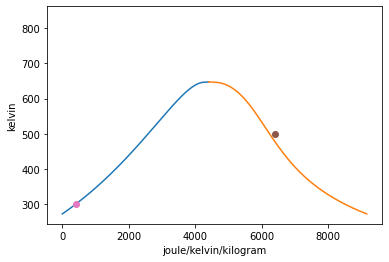

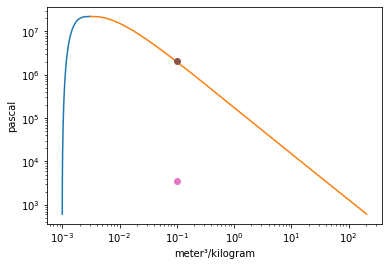

In [33]:
Vapor = VaporDome(substance, ('s', 'T'))
Vapor.plot('v','p')

T_1 = Q_(560.0, 'degC')
p_1 = Q_(14.0, 'MPa')
T_2 = Q_(75.0, 'degC')
p_2 = Q_(14.0, 'MPa')
T_3 = Q_(500.0, 'K')
v_3 = Q_(.1, "m**3/kg")
T_4 = Q_(300.0, 'K')
v_4 = Q_(.1, "m**3/kg")

st_1 = State(substance, T=T_1, p=p_1)
st_2 = State(substance, T=T_2, p=p_2)
st_3 = State(substance, T=T_3, v=v_3)
st_4 = State(substance, T=T_4, v=v_4)

Vapor.add_process(st_1, st_2, 'isobaric')
Vapor.add_process(st_3, st_4, 'isochoric')

Vapor.remove_process(st_1, st_2, True)
Vapor.remove_process(st_3, st_4)


The scale of the axes for 'p' and 'v' are in log by default and for all other axis types are linear by default. This can be overidden using the set_xscale and set_yscale functions. The syntax for these functions are set_xscale(self, x_axis, y_axis, scale="linear") and set_yscale(self, x_axis, y_axis, scale="linear") respectively. The x_axis and y_axis inputs specify which graph you want to alter the axis scale for. 

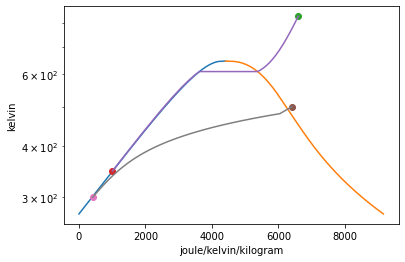

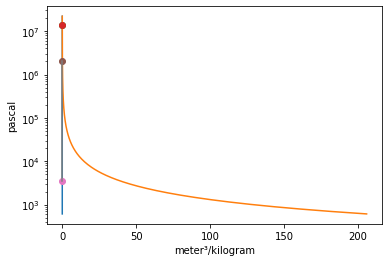

In [35]:
Vapor = VaporDome(substance, ('s', 'T'))
Vapor.plot('v','p')

T_1 = Q_(560.0, 'degC')
p_1 = Q_(14.0, 'MPa')
T_2 = Q_(75.0, 'degC')
p_2 = Q_(14.0, 'MPa')
T_3 = Q_(500.0, 'K')
v_3 = Q_(.1, "m**3/kg")
T_4 = Q_(300.0, 'K')
v_4 = Q_(.1, "m**3/kg")

st_1 = State(substance, T=T_1, p=p_1)
st_2 = State(substance, T=T_2, p=p_2)
st_3 = State(substance, T=T_3, v=v_3)
st_4 = State(substance, T=T_4, v=v_4)

Vapor.add_process(st_1, st_2, 'isobaric')
Vapor.add_process(st_3, st_4, 'isochoric')

Vapor.set_yscale('s', 'T', 'log')
Vapor.set_xscale('v', 'p', 'linear')